In [2]:
import darksim.framework as framework
import darksim.dmath as dmath
import darksim.utils as utils
import flowpm
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt

from darksim.utils import const

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [4]:
uni = framework.ModelUniverse(w=-50, vis_matter=0.06, dark_matter=0.24, dark_energy=0.67, radiation=8.4e-5, use_default=False, de_type='cc')

In [5]:
Htimes = np.linspace(-1, 1, 10000000)
a = dmath.scalefactor.bulk_viscosity
def a(Ht, zeta0, zeta1): # times in Gyr
    # Ignore errors, this just means the universe hasn't been born
    with np.errstate(invalid='ignore'):
        return np.power((zeta0 + zeta1 - 3 + (3 - zeta1) * np.exp(0.5 * zeta0 * Ht)) * (1 / zeta0), 2 / (3 - zeta1))

In [6]:
a(Htimes, 1, -1)

array([       nan,        nan,        nan, ..., 1.89601787, 1.89601804,
       1.89601822])

<ipython-input-5-7e1addf465bb>:6: RuntimeWarning: overflow encountered in exp
  return np.power((zeta0 + zeta1 - 3 + (3 - zeta1) * np.exp(0.5 * zeta0 * Ht)) * (1 / zeta0), 2 / (3 - zeta1))
<ipython-input-5-7e1addf465bb>:6: RuntimeWarning: overflow encountered in multiply
  return np.power((zeta0 + zeta1 - 3 + (3 - zeta1) * np.exp(0.5 * zeta0 * Ht)) * (1 / zeta0), 2 / (3 - zeta1))
/home/rettwolf/.local/lib/python3.9/site-packages/numpy/lib/function_base.py:1068: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)
/home/rettwolf/.local/lib/python3.9/site-packages/numpy/lib/function_base.py:1096: RuntimeWarning: invalid value encountered in double_scalars
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_n


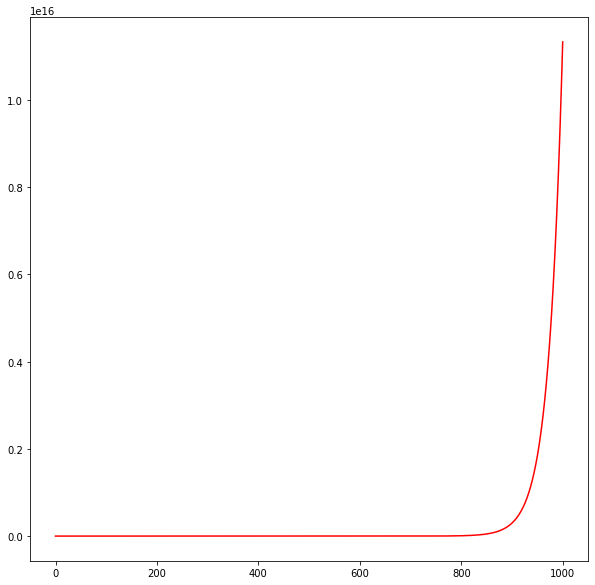

In [25]:
Htimes = np.linspace(-1, 1000, 1000)
fig = plt.figure()

x, y = np.gradient(Htimes), np.gradient(a(Htimes, 5, -1))

# plt.plot(Htimes, a(Htimes, 5, -1), color='gold')
# plt.plot(Htimes, y/x, color='gold')
# plt.plot(Htimes, a(Htimes, 4, -10), color='black')
# plt.plot(Htimes, a(Htimes, 4, -1), color='cyan', linestyle='dashed')
# plt.plot(Htimes, a(Htimes, 3.5, -3), color='blue')
# plt.plot(Htimes, a(Htimes, 5, -3), color='purple')
plt.plot(Htimes, a(Htimes, .4, -8), color='red')




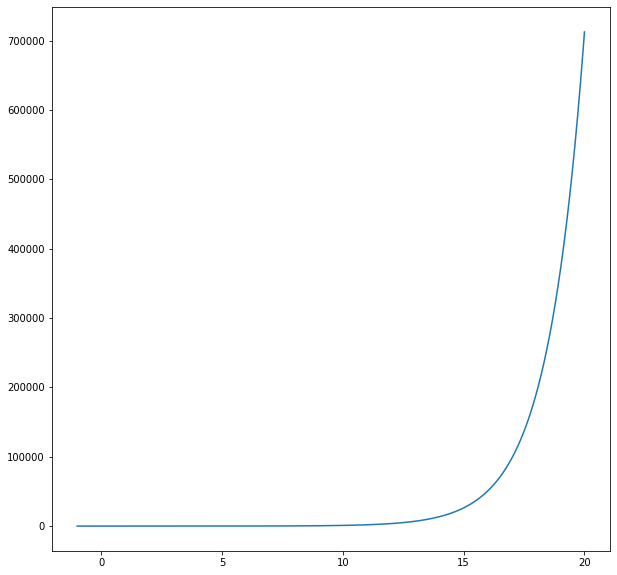

In [7]:
plt.plot(Htimes, dmath.scalefactor.bulk_viscosity(Htimes))

In [12]:
20 / utils.const.H_0_si + 13.6*3.15e16

4.284e+17

In [13]:
4.284e17 / 3.15e16

13.6

In [11]:
a(Htimes, 1, -1)

array([        nan,         nan,         nan, ..., 24.30333276,
       24.30333948, 24.3033462 ])